## Introduction

This notebook demonstrates the process of solving a linear regression problem using various methods. The code is designed to work with datasets comprised of numerical data, assuming that the target variable is in the first column of the data table.

Here's a quick rundown of the notebook's contents:

- **Data Loading**: We will be loading data from a CSV file. Please make sure to specify the correct path to the .csv file in the code cell provided.

- **Data Splitting**: We will split the data into independent and dependent variables, followed by further subsets for training, cross-validation, and testing.

- **Feature Importance Calculation**: We calculate and filter features based on the Gini coefficient.

- **Feature Visualization**: We view correlations between features through a heat map.

- **Model Training**: We train various models, including Artificial Neural Networks, Ordinary Least Squares, and our custom linear regression model.

- **Model Evaluation**: Each model's performance is evaluated using the Mean Squared Error (MSE), and the results of each are compared in a final plot.

Remember to ensure that the `utils.py` file, which houses necessary functions, is in the same directory as this notebook for successful execution.


In [1]:
# Import libraries (utils.py should be in the same folder as the notebook)
from utils import *

In [2]:
# Load data with your path to the table
df = pd.read_csv('weather_data_bucharest_2000_2023.csv', encoding = "ISO-8859-1")

In [3]:
# Split data into independent and dependent variables. The first column should be the dependent variable y.
y = df.iloc[:, 0] # The Y-axis variable
x = df.iloc[:, 1:] #.drop(columns='temp', axis=1)

In [4]:
# Split the data into 3 samples: train, cross validation (cv) and test
x_train, x_, y_train, y_ = train_test_split(x, y, train_size=.6, shuffle=False) # Split into train and the rest
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=.5, shuffle=False) # Split the rest into cv and test

The selected best min splits is 30, best max depth is 8 and the best n estimators is 50.


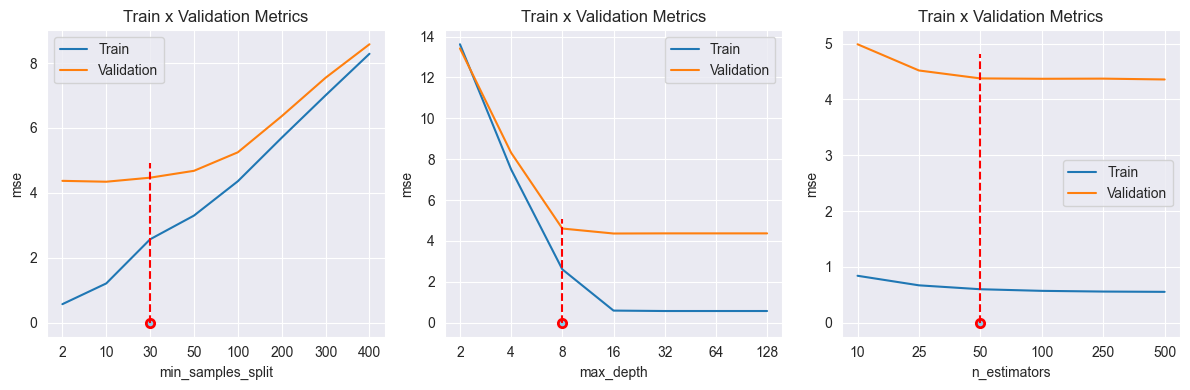

In [5]:
# Run multiple Random Forest (RF) models to find best RF parameters
best_min_split, best_max_depth, best_n_estimators = BestParam.best_forest_regressor(x_train, y_train, x_cv, y_cv)

,feature,gini
0,month_cos,0.822354
1,dew,0.119011
2,humidity,0.032033
3,cloudcover,0.013244
4,sunup_hours,0.002275
5,windspeed,0.002106
6,precip,0.001872
7,sealevelpressure,0.001489
8,conditions_snow,0.000930
9,winddir,0.000880


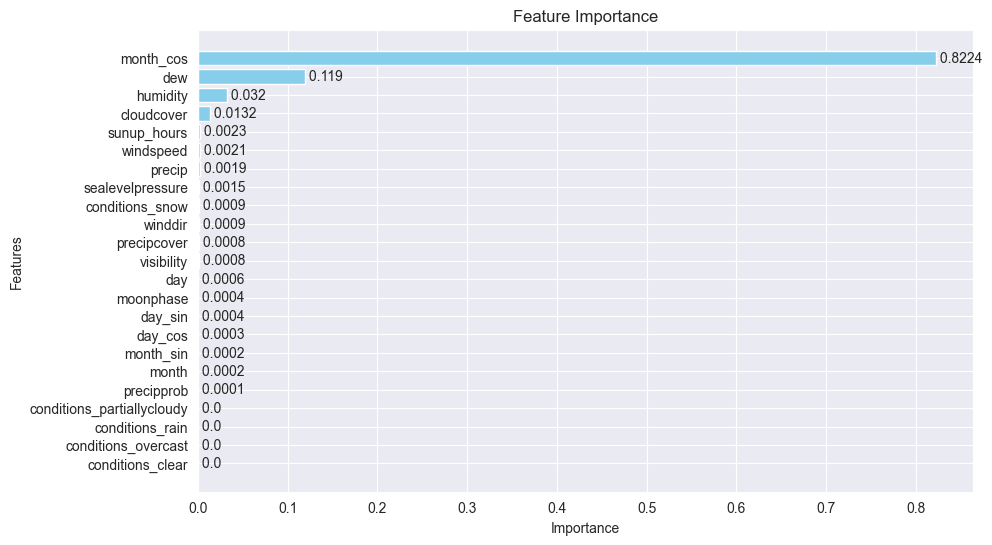

In [6]:
# Calculating the Gini coefficient for the variables and select the ones above 0.The parameters values are based on the previous step. Feel free to change if relevant
all_feature_importance = feature_importance(x_train, y_train, best_min_split, best_max_depth, best_n_estimators) 
# View the list of variables with gini importance above 0 and plotted on a bar graph
all_feature_importance

In [7]:
# Filter the samples to only include the selected features
x_train_all = x_train[list(all_feature_importance.iloc[:, 0])]
x_cv_all = x_cv[list(all_feature_importance.iloc[:, 0])]

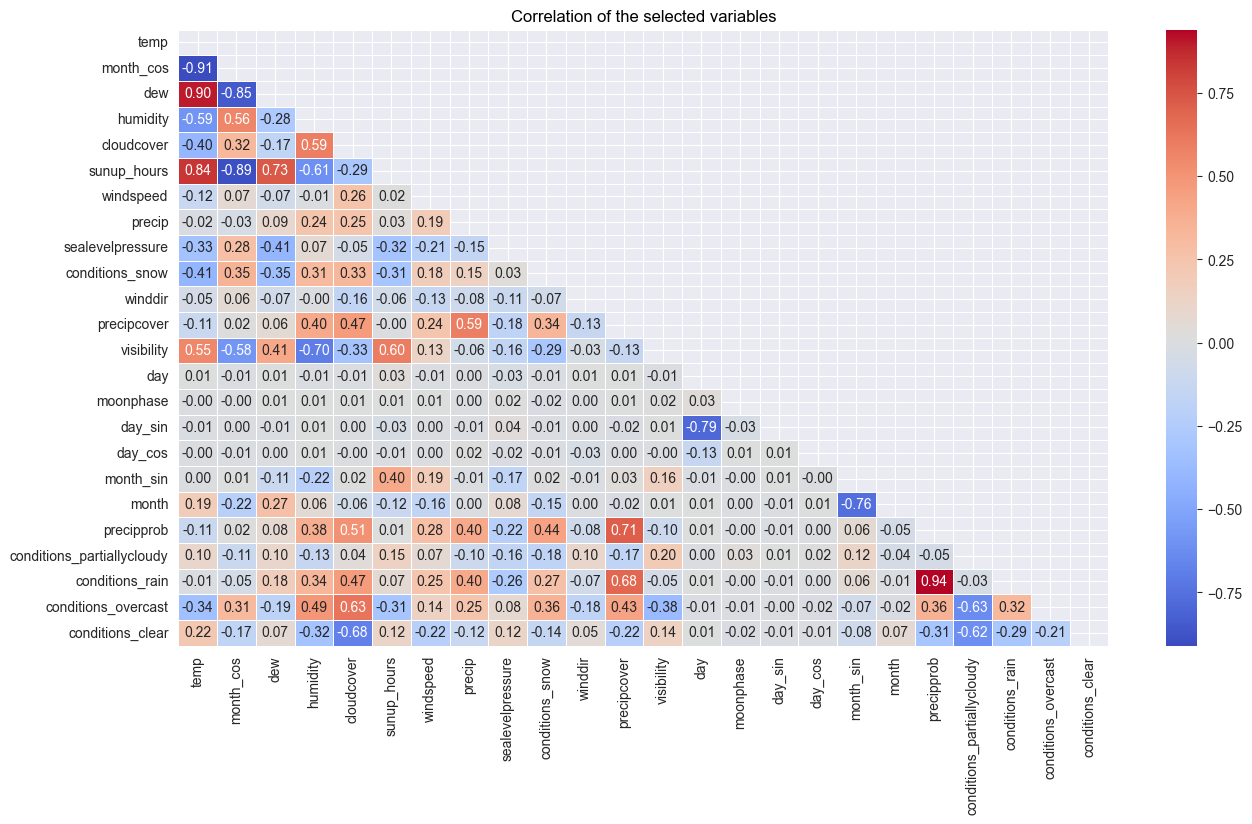

In [8]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_all, y_train)

Running for Polynomial degree = 1
Added column dew with the MSE: 14.991078
Added column humidity with the MSE: 4.862087
Added column month_cos with the MSE: 4.559663
Added column cloudcover with the MSE: 4.353259
Added column precipprob with the MSE: 4.290084
Added column sunup_hours with the MSE: 4.219468

Selected features: ['dew', 'humidity', 'month_cos', 'cloudcover', 'precipprob', 'sunup_hours'] 

Running for Polynomial degree = 2
Added column dew with the MSE: 14.920387
Added column humidity with the MSE: 4.743197
Added column month_cos with the MSE: 4.444207
Added column cloudcover with the MSE: 4.154589
Added column sunup_hours with the MSE: 4.035950
Added column sealevelpressure with the MSE: 3.936768
Added column conditions_snow with the MSE: 3.886138

Selected features: ['dew', 'humidity', 'month_cos', 'cloudcover', 'sunup_hours', 'sealevelpressure', 'conditions_snow'] 

Running for Polynomial degree = 3
Added column dew with the MSE: 14.557461
Added column humidity with the

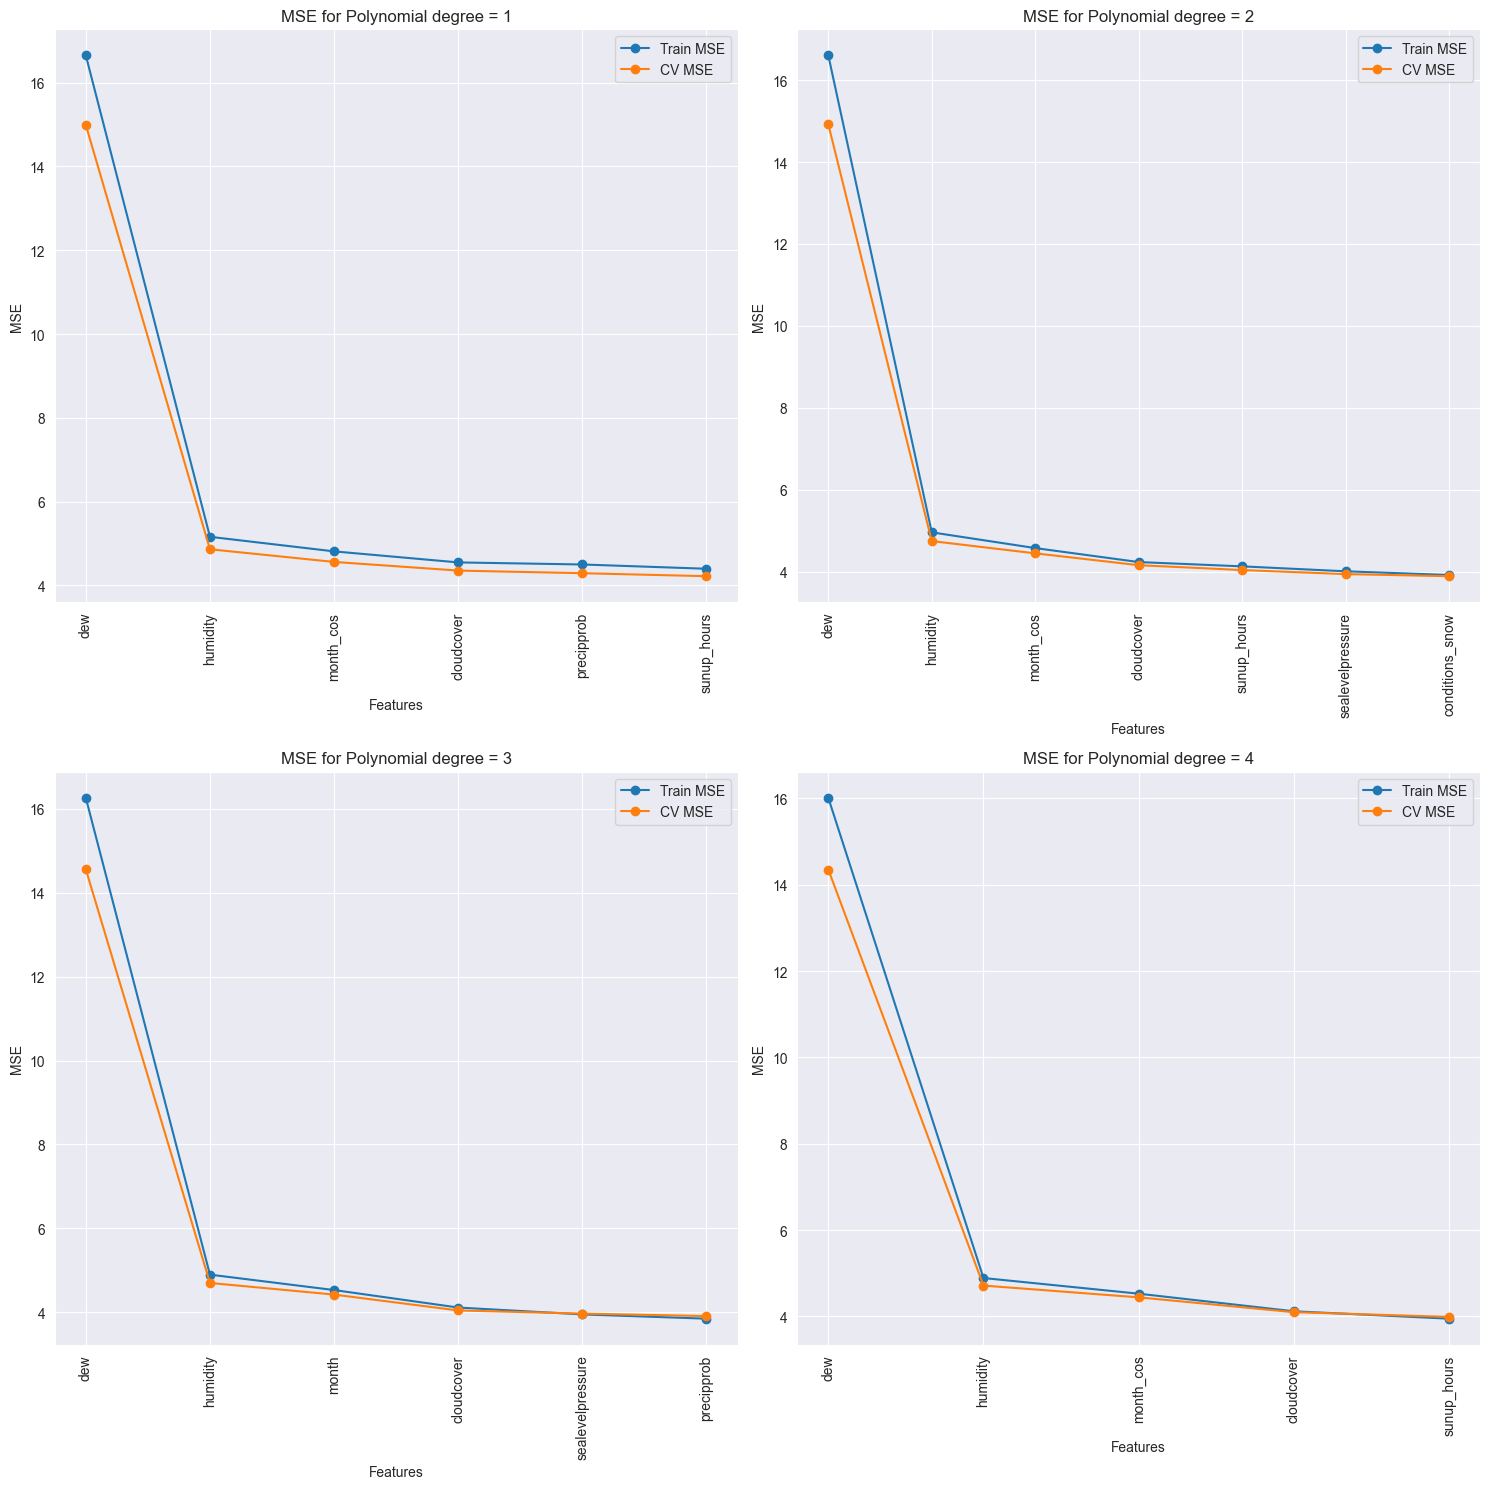

Features selected at least twice ['dew', 'humidity', 'month_cos', 'cloudcover', 'precipprob', 'sunup_hours', 'sealevelpressure']


In [9]:
# Compute the MSE using OLS linear regression model by adding each feature to a new model. Iterate this throughout 4 degrees of polynomial.
selected_features, all_feature_importance = linear_regression_feature_performance(x_train_all, y_train, x_cv_all, y_cv, all_feature_importance, max_poly_degree=4, reduce_corr=False, corr_limit=0.8)

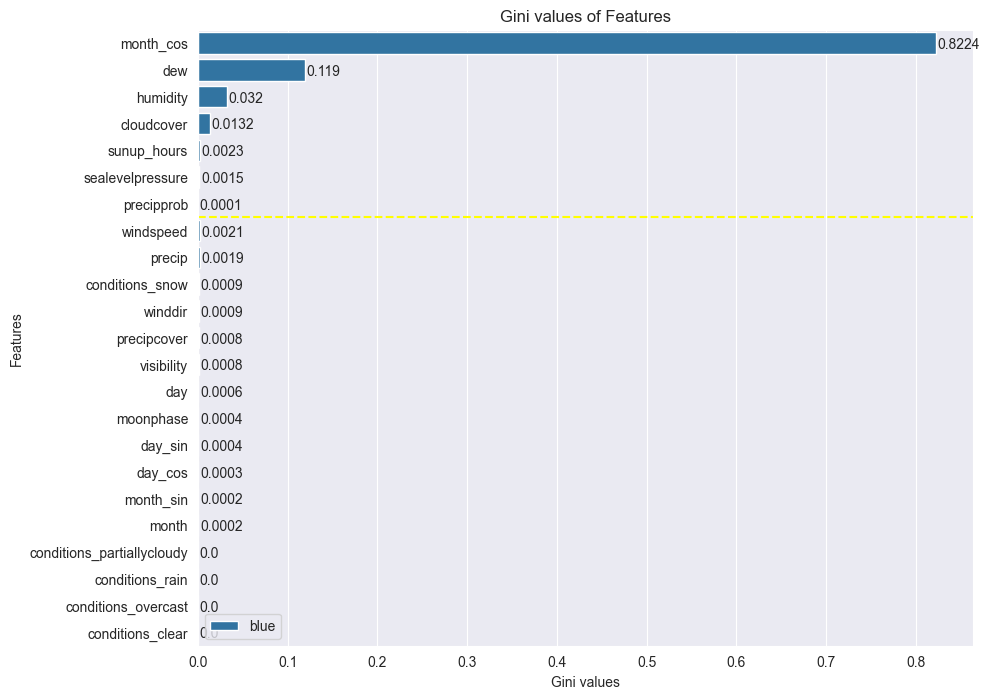

In [10]:
# Plot the gini value with the selected features
plot_selected_features(selected_features, all_feature_importance)

In [11]:
# Filter the samples to only include the selected features
x_train_rdy = x_train[list(selected_features.iloc[:, 0])]
x_cv_rdy = x_cv[list(selected_features.iloc[:, 0])]
x_test_rdy = x_test[list(selected_features.iloc[:, 0])]

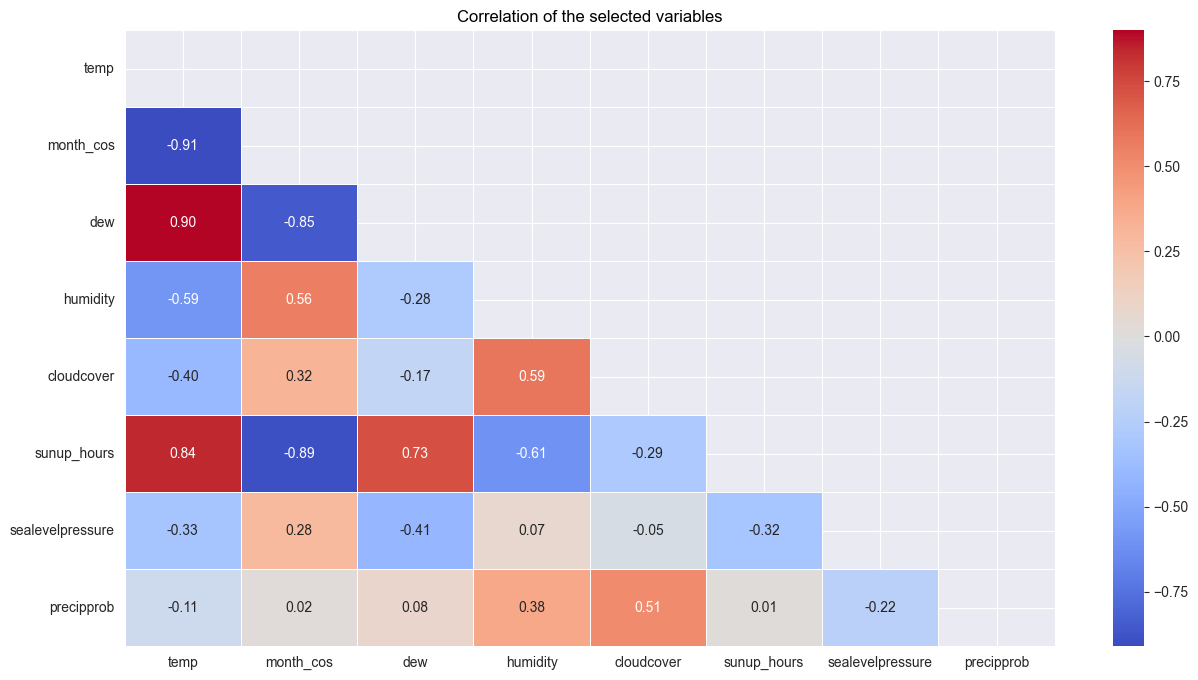

In [12]:
# Visualize the feature correlations via a heat map
plot_correlation_heatmap(x_train_rdy, y_train)

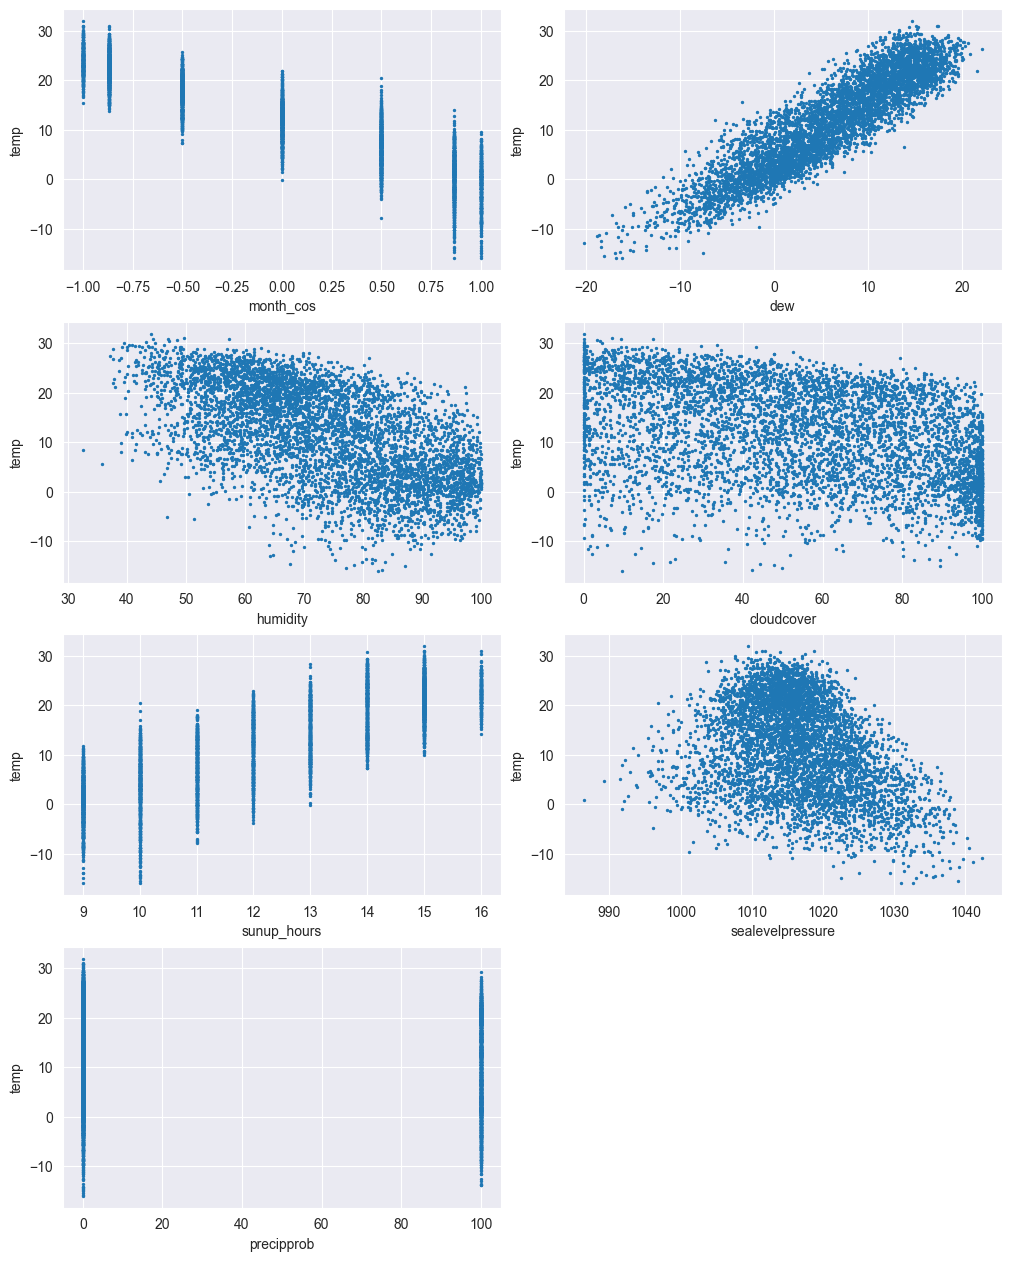

In [13]:
# Plot the selected features of the train sample
plot_features(x_train_rdy,y_train)

In [14]:
# Dictionaries to store models information
all_models = {}
all_mse = {}
all_standardscaler = {}
all_polyft = {}

55/55 [==============================] - 0s 338us/step
Development of the model with polynomial degree of 1
The MSE for the train set is 3.706115 and the Cross Validation is: 4.249639
55/55 [==============================] - 0s 366us/step
Development of the model with polynomial degree of 2
The MSE for the train set is 3.220792 and the Cross Validation is: 4.901451
55/55 [==============================] - 0s 416us/step
Development of the model with polynomial degree of 3
The MSE for the train set is 2.959433 and the Cross Validation is: 5.461333
55/55 [==============================] - 0s 371us/step
Development of the model with polynomial degree of 4
The MSE for the train set is 1.804529 and the Cross Validation is: 6.995958
55/55 [==============================] - 0s 318us/step
The mean squared error of the selected model of 1 polynomial degree on the test sample is 4.475693


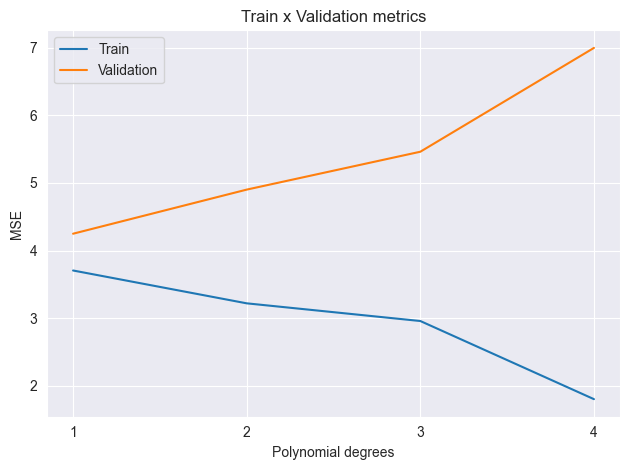

In [15]:
# Run a Neural Network with 3 LeakyReLU input layers with 24/16/8 units and alpha of 0.2 and a linear output layer using tensorflow.keras library
all_models['neural_network'], all_standardscaler['neural_network'], all_polyft['neural_network'], pred_test_nn, all_mse['neural_network'] = linear_neural_regression(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test, max_degree=4, learning_rate=0.001, epochs=500,verbose=0)

The mean squared error for the polynomial degree of 1 on the train sample is: 4.392429, the mean squared error on the crossvalidation sample is: 4.214101
The mean squared error for the polynomial degree of 2 on the train sample is: 3.895399, the mean squared error on the crossvalidation sample is: 3.893071
The mean squared error for the polynomial degree of 3 on the train sample is: 3.723235, the mean squared error on the crossvalidation sample is: 3.860253
The mean squared error for the polynomial degree of 4 on the train sample is: 3.533641, the mean squared error on the crossvalidation sample is: 4.120126
The mean squared error for the polynomial degree of 5 on the train sample is: 3.187374, the mean squared error on the crossvalidation sample is: 5.115084
The selected degree of polynomial is 3
The mean squared error of the selected model of 3 polynomial degree on the test sample is 4.127302


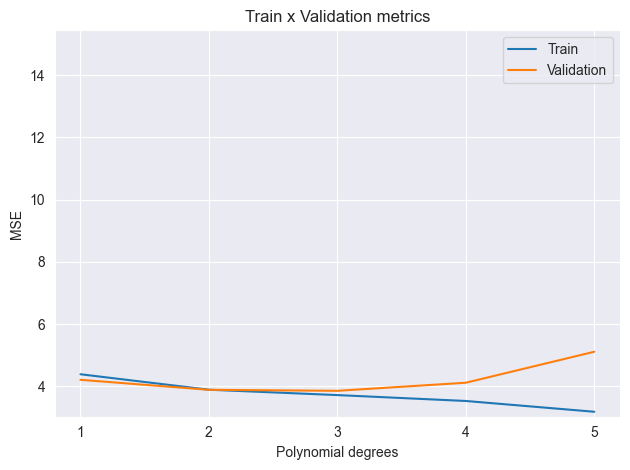

In [16]:
# Run a linear regression algorithm based on OLS (normal equation) using sci-kit learn library
all_models['ols'], all_standardscaler['ols'], all_polyft['ols'], pred_test_ols, all_mse['ols'] = linear_regression_ols(x_train_rdy, y_train, x_cv_rdy, y_cv, x_test_rdy, y_test)

In [17]:
# Assign values for the gradient_descent function parameters
iterations = 10000
alpha = 5.0e-3
all_models['gradient'] = {}
# Run a manual linear regression algorithm with a gradient descent method
all_models['gradient']['w'], all_models['gradient']['b'],  all_standardscaler['gradient'], all_polyft['gradient'], pred_test_gd, all_mse['gradient'] = linear_regression_gradient_descent(x_train_rdy,
                                                                        y_train,
                                                                        x_cv_rdy,
                                                                        y_cv,
                                                                        x_test_rdy,
                                                                        y_test,
                                                                        alpha,
                                                                        iterations,
                                                                        last_errors=10,
                                                                        cost_decimals=4)

Iteration 200: Cost [12.66086036]
Iteration 300: Cost [6.60091844]
Iteration 400: Cost [4.29437749]
Iteration 500: Cost [3.37313039]
Iteration 600: Cost [2.97625649]
Iteration 700: Cost [2.78350392]
Iteration 800: Cost [2.67415884]
Iteration 900: Cost [2.6017993]
Iteration 1000: Cost [2.54795045]
Iteration 1100: Cost [2.50482532]
Iteration 1200: Cost [2.46883676]
Iteration 1300: Cost [2.43812175]
Iteration 1400: Cost [2.41157419]
Iteration 1500: Cost [2.38845286]
Iteration 1600: Cost [2.36821368]
Iteration 1700: Cost [2.35043232]
Iteration 1800: Cost [2.33476499]
Iteration 1900: Cost [2.32092651]
Iteration 2000: Cost [2.30867668]
Iteration 2100: Cost [2.29781119]
Iteration 2200: Cost [2.28815508]
Iteration 2300: Cost [2.27955775]
Iteration 2400: Cost [2.27171548]
Iteration 2500: Cost [2.26423853]
Iteration 2600: Cost [2.25761747]
Iteration 2700: Cost [2.25174176]
Iteration 2800: Cost [2.24651642]
Iteration 2900: Cost [2.24185966]
Iteration 3000: Cost [2.23770099]
Iteration 3100: Cost [

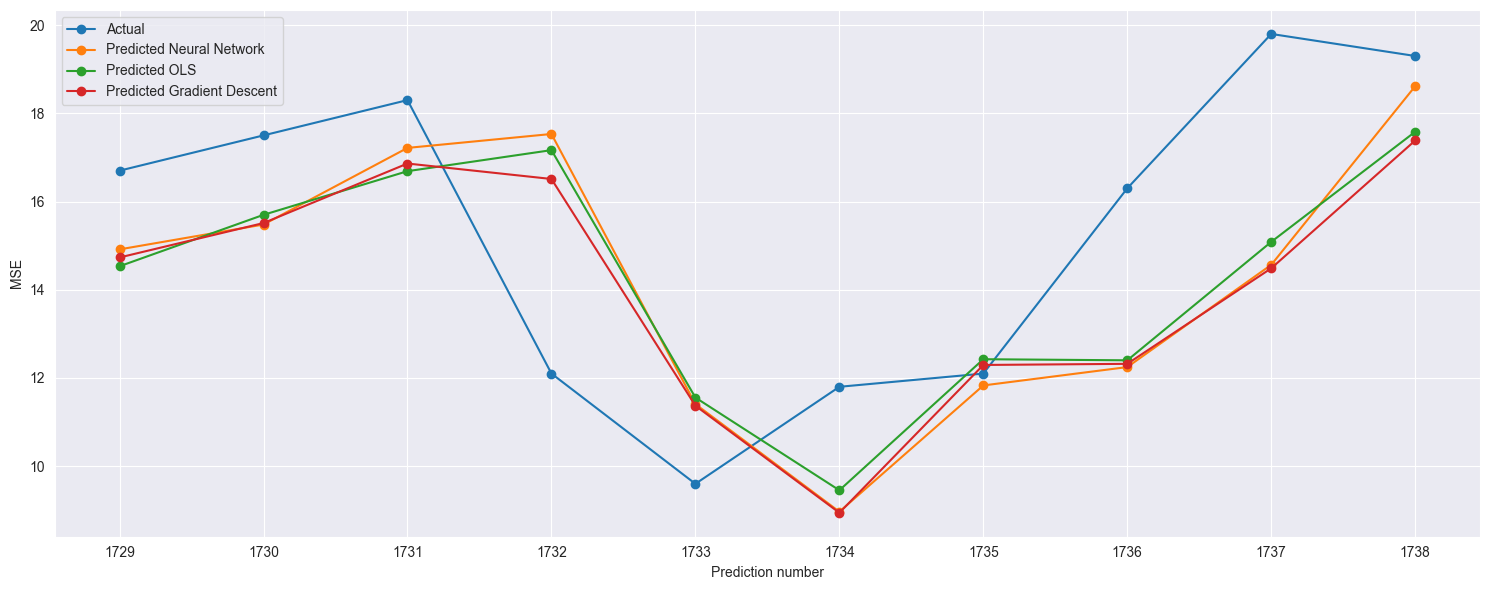

In [18]:
# Labels for the model names
model_labels = ['Neural Network', 'OLS', 'Gradient Descent']

# Plot Predicted values vs actual ones
plot_actual_vs_predicted(y_test, pred_test_nn, pred_test_gd, pred_test_ols, labels=model_labels, observations=10)

In [19]:
# Select the best linear regression method and store the model's data for future predictions
selected_model, standardization, polynomial_transformation = best_regression(all_mse, all_models, all_standardscaler, all_polyft)

The best selected model is ols
